# NSRDB and SAM for Solar Power Calculation
---

**NREL**: National Renewable Energy Laboratory

**NSRDB**: National Solar Radiation Database  
Information can be found at https://nsrdb.nrel.gov  
API key Signup: https://developer.nrel.gov/signup/  
API instructions: https://developer.nrel.gov/docs/solar/nsrdb/psm3-download/

**SAM**: System Advisor Model  
Information can be found at https://sam.nrel.gov/  
SDK: https://sam.nrel.gov/sdk. The SDK needs to be downloaded.

NSRDB is a serially complete collection of meteorological and solar irradiance data sets for the United States and a growing list of international locations. NSRDB uses a physics-based modeling (PSM: Physical Solar Model) approach to provide solar radiation data for the entire United States in gridded segments (4x4 square kilometer) using geostationary satellites. Data can be accessed via an API.

The [PVWatts v7](https://nrel-pysam.readthedocs.io/en/master/modules/Pvwattsv7.html) model is used to estimate the power output.

In [ ]:
from powersimdata.input.grid import Grid
from prereise.gather.solardata.nsrdb import sam
from prereise.gather.solardata.helpers import to_reise

from getpass import getpass
from matplotlib import pyplot

## 1. Solar plants in Network

In [2]:
grid = Grid(['Eastern'])
solar_plant = grid.plant.groupby('type').get_group('solar')

Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv


In [3]:
solar_plant.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,type,interconnect,GenFuelCost,GenIOB,GenIOC,GenIOD,zone_id,zone_name,lat,lon
plant_id,,,,,,,,,,,,,,,,,,,,,
375,2483,2.0,0.0,0.0,0.0,1.04,2.40,1,4.356,1.198020,...,solar,Eastern,0.0,0.0,0.0,0,3,Vermont,44.3652,-73.1901
376,2483,2.0,0.0,0.0,0.0,1.04,2.40,1,4.356,0.566337,...,solar,Eastern,0.0,0.0,0.0,0,3,Vermont,44.3652,-73.1901
390,2509,2.0,0.0,0.0,0.0,1.04,2.40,1,4.356,0.479208,...,solar,Eastern,0.0,0.0,0.0,0,3,Vermont,44.0935,-72.6072
391,2509,1.8,0.0,0.0,0.0,1.04,2.16,1,3.921,1.459406,...,solar,Eastern,0.0,0.0,0.0,0,3,Vermont,44.0935,-72.6072
403,2524,2.2,0.0,0.0,0.0,1.04,2.64,1,4.792,0.718812,...,solar,Eastern,0.0,0.0,0.0,0,3,Vermont,44.4438,-73.1570


In [4]:
print("There are %d solar plants in the Eastern interconnection." % len(solar_plant))

There are 670 solar plants in the Eastern interconnection.


## 2. Downloading Data
Visit https://developer.nrel.gov/signup/ to get your API key. Set the path to the SAM Simulation Core (SSC) library in `ssc_lib`.

In [5]:
email = input(prompt='email=')
key = getpass(prompt='api_key=')
data = sam.retrieve_data(solar_plant, email, key)

email= jon.hagg@breakthroughenergy.org
api_key= ········································


No solar PV plant in LA
No solar PV plant in ME
No solar PV plant in MT
No solar PV plant in ND
No solar PV plant in NH
No solar PV plant in WV


100%|██████████| 341/341 [17:25<00:00,  3.86s/it]


In [6]:
data.head(n=20)

,Pout,plant_id,ts,ts_id
0,0.0,375,2016-01-01,1
1,0.0,376,2016-01-01,1
2,0.0,390,2016-01-01,1
3,0.0,391,2016-01-01,1
4,0.0,403,2016-01-01,1
5,0.0,404,2016-01-01,1
6,0.0,405,2016-01-01,1
7,0.0,440,2016-01-01,1
8,0.0,441,2016-01-01,1
9,0.0,442,2016-01-01,1


In [7]:
data.describe()

,Pout,plant_id,ts_id
count,5.885280e+06,5.885280e+06,5.885280e+06
mean,3.440420e+00,4.161507e+03,4.392500e+03
std,1.237313e+01,4.225498e+03,2.535723e+03
min,0.000000e+00,3.750000e+02,1.000000e+00
25%,0.000000e+00,1.888000e+03,2.196750e+03
50%,0.000000e+00,3.067500e+03,4.392500e+03
75%,1.656395e+00,3.834000e+03,6.588250e+03
max,4.277410e+02,1.372600e+04,8.784000e+03


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [8]:
id = 375
print("Capacity of the plant: %.1f MW" % solar_plant.loc[id].Pmax)

Capacity of the plant: 4.4 MW


In [9]:
data_oneplant = data[data.plant_id == id]

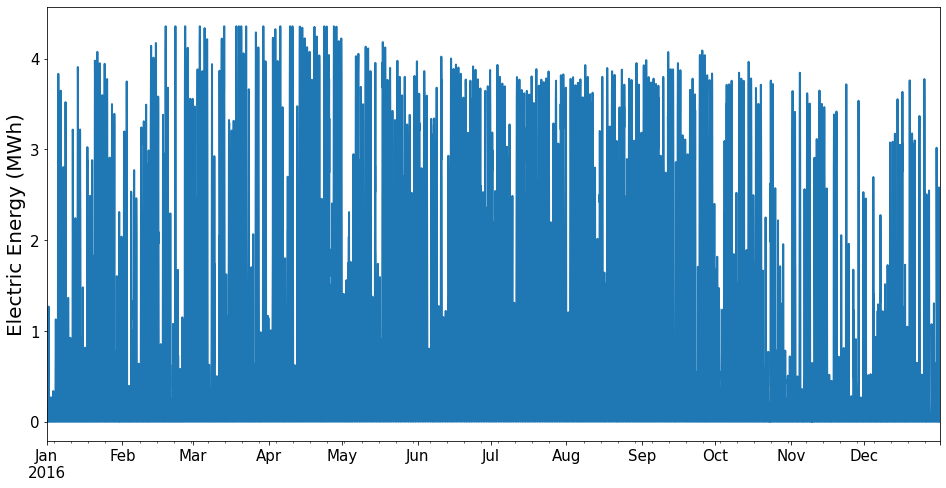

In [10]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant.plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

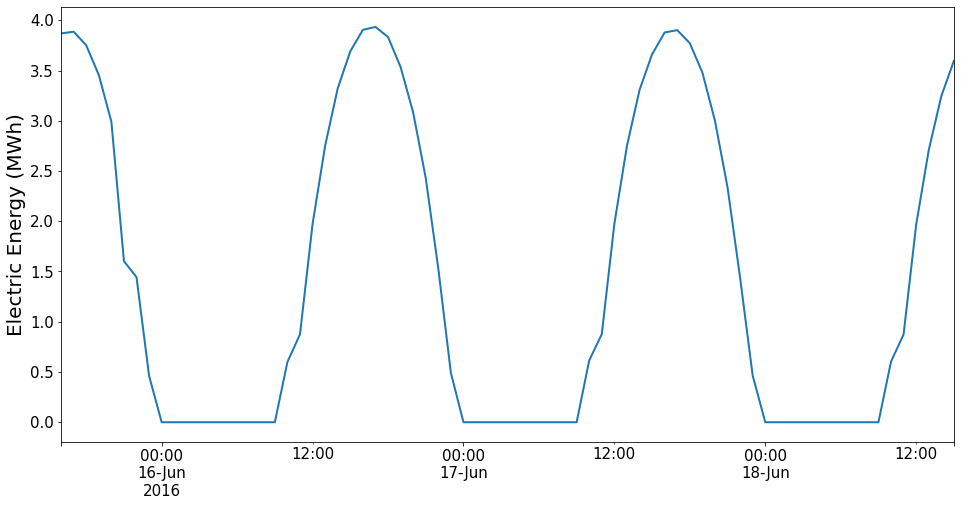

In [11]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant[4000:4072].plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

In [12]:
print("Capacity Factor: %.3f" % (data_oneplant['Pout'].sum() / (366 * 24 * solar_plant.loc[id].Pmax)))

Capacity Factor: 0.190


## 4. Format Data
Data are formated for REISE

In [13]:
data_reise = to_reise(data)

In [14]:
data_reise.tail()

,375,376,390,391,403,404,405,440,441,442,...,13717,13718,13719,13720,13721,13722,13723,13724,13725,13726
UTC,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,1.802588,1.802588,1.204000,1.083769,0.984141,0.984141,0.984141,0.391388,0.411907,0.473746,...,38.585445,41.587512,38.136997,38.078549,38.033472,21.468596,37.127250,36.938649,38.645792,31.027051
2016-12-31 20:00:00,0.733724,0.733724,0.436323,0.392752,0.297816,0.297816,0.297816,0.097186,0.102281,0.117636,...,32.277924,34.409281,29.589220,29.619043,29.295198,16.919824,30.965038,28.890939,30.179399,24.932607
2016-12-31 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.210601,21.971607,14.772841,14.754238,14.481550,10.282778,20.655036,14.235361,15.880819,15.580715
2016-12-31 22:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.635382,0.244461,0.000000,0.000000,0.000000,1.396410,5.171844,0.000000,0.000000,0.362694
2016-12-31 23:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
